# Part I - (Gorkha 2015 Earthquake Dataset Exploration )
## by (Sekinat Oyero)

## Introduction
This dataset contains the household survey of the 7.8Mw earthquake that happened in Gorkha region in April, 2015. It gives information about the 260601 building structures and damage in the  earthquake affected region. each row represent a building and each column represent a property and there are 39 columns now. The properties of these buildings present in the dataset are described below
1. geo_level_1_id, geo_level_2_id, geo_level_3_id (type: int): geographic region in which building exists, from largest (level 1) to most specific sub-region (level 3). Possible values: level 1: 0-30, level 2: 0-1427, level 3: 0-12567.
2. count_floors_pre_eq (type: int): number of floors in the building before the earthquake.
3. age (type: int): age of the building in years.
4. area_percentage (type: int): normalized area of the building footprint.
5. height_percentage (type: int): normalized height of the building footprint.
6. land_surface_condition (type: categorical): surface condition of the land where the building was built. Possible values: n, o, t.
7. foundation_type (type: categorical): type of foundation used while building. Possible values: h, i, r, u, w.
8. roof_type (type: categorical): type of roof used while building. Possible values: n, q, x.
9. ground_floor_type (type: categorical): type of the ground floor. Possible values: f, m, v, x, z.
10. other_floor_type (type: categorical): type of constructions used in higher than the ground floors (except of roof). Possible values: j, q, s, x.
11. position (type: categorical): position of the building. Possible values: j, o, s, t.
12. plan_configuration (type: categorical): building plan configuration. Possible values: a, c, d, f, m, n, o, q, s, u.
13. has_superstructure_adobe_mud (type: binary): flag variable that indicates if the superstructure was made of Adobe/Mud.
14. has_superstructure_mud_mortar_stone (type: binary): flag variable that indicates if the superstructure was made of Mud Mortar - Stone.
15. has_superstructure_stone_flag (type: binary): flag variable that indicates if the superstructure was made of Stone.
16. has_superstructure_cement_mortar_stone (type: binary): flag variable that indicates if the superstructure was made of Cement Mortar - Stone.
17. has_superstructure_mud_mortar_brick (type: binary): flag variable that indicates if the superstructure was made of Mud Mortar - Brick.
18. has_superstructure_cement_mortar_brick (type: binary): flag variable that indicates if the superstructure was made of Cement Mortar - Brick.
19. has_superstructure_timber (type: binary): flag variable that indicates if the superstructure was made of Timber.
20. has_superstructure_bamboo (type: binary): flag variable that indicates if the superstructure was made of Bamboo.
21. has_superstructure_rc_non_engineered (type: binary): flag variable that indicates if the superstructure was made of non-engineered reinforced concrete.
22. has_superstructure_rc_engineered (type: binary): flag variable that indicates if the superstructure was made of engineered reinforced concrete.
23. has_superstructure_other (type: binary): flag variable that indicates if the superstructure was made of any other material.
24. legal_ownership_status (type: categorical): legal ownership status of the land where building was built. Possible values: a, r, v, w.
25. count_families (type: int): number of families that live in the building.
26. has_secondary_use (type: binary): flag variable that indicates if the building was used for any secondary purpose.
27. has_secondary_use_agriculture (type: binary): flag variable that indicates if the building was used for agricultural purposes.
28. has_secondary_use_hotel (type: binary): flag variable that indicates if the building was used as a hotel.
29. has_secondary_use_rental (type: binary): flag variable that indicates if the building was used for rental purposes.
30. has_secondary_use_institution (type: binary): flag variable that indicates if the building was used as a location of any institution.
31. has_secondary_use_school (type: binary): flag variable that indicates if the building was used as a school.
32. has_secondary_use_industry (type: binary): flag variable that indicates if the building was used for industrial purposes.
33. has_secondary_use_health_post (type: binary): flag variable that indicates if the building was used as a health post.
34. has_secondary_use_gov_office (type: binary): flag variable that indicates if the building was used fas a government office.
35. has_secondary_use_use_police (type: binary): flag variable that indicates if the building was used as a police station.
36. has_secondary_use_other (type: binary): flag variable that indicates if the building was secondarily used for other purposes.

The data quality issues in the dataset has been addressed. the has seconday use subset columns has been merged to form a column "seconday use type". Also the superstructure columns has been merged under a column "superstructure material". Presently, the data now contains 21 columns. 



## Preliminary Wrangling


In [41]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

In [42]:
# Display entire dataframe width
pd.set_option("display.max_columns", 999)

In [43]:
# Loading the dataset
quake=pd.read_csv('quake_data.csv')
quake.head()

,building_id,geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,area_percentage,height_percentage,land_surface_condition,foundation_type,roof_type,ground_floor_type,other_floor_type,position,plan_configuration,legal_ownership_status,count_families,has_secondary_use,secondary_use_type,superstructure_material,damage_grade
0,829111,11,131,12161,3,25,5,6,t,r,n,f,q,o,d,v,1,No,None,adobe_mud,medium
1,790802,8,463,6973,1,25,12,2,t,r,n,f,j,t,d,v,1,Yes,hotel,adobe_mud,medium
2,835288,27,533,3632,3,50,11,7,t,r,n,f,q,s,d,v,1,No,None,adobe_mud,high
3,198773,3,574,2913,2,20,7,5,t,r,n,f,q,s,d,v,0,No,None,adobe_mud,medium
4,821866,27,1394,6663,2,20,3,4,t,r,n,f,q,s,d,v,1,No,None,adobe_mud,medium


In [44]:
# checking shape
quake.shape

(260601, 21)

In [45]:
# checking columns
quake.columns

Index(['building_id', 'geo_level_1_id', 'geo_level_2_id', 'geo_level_3_id',
       'count_floors_pre_eq', 'age', 'area_percentage', 'height_percentage',
       'land_surface_condition', 'foundation_type', 'roof_type',
       'ground_floor_type', 'other_floor_type', 'position',
       'plan_configuration', 'legal_ownership_status', 'count_families',
       'has_secondary_use', 'secondary_use_type', 'superstructure_material',
       'damage_grade'],
      dtype='object')

In [46]:
# checking summary of dataset
quake.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 260601 entries, 0 to 260600
Data columns (total 21 columns):
 #   Column                   Non-Null Count   Dtype 
---  ------                   --------------   ----- 
 0   building_id              260601 non-null  int64 
 1   geo_level_1_id           260601 non-null  int64 
 2   geo_level_2_id           260601 non-null  int64 
 3   geo_level_3_id           260601 non-null  int64 
 4   count_floors_pre_eq      260601 non-null  int64 
 5   age                      260601 non-null  int64 
 6   area_percentage          260601 non-null  int64 
 7   height_percentage        260601 non-null  int64 
 8   land_surface_condition   260601 non-null  object
 9   foundation_type          260601 non-null  object
 10  roof_type                260601 non-null  object
 11  ground_floor_type        260601 non-null  object
 12  other_floor_type         260601 non-null  object
 13  position                 260601 non-null  object
 14  plan_configuration  

In [47]:
# separating columns into numeric and categorical 
col_num=['count_floors_pre_eq', 'age', 'area_percentage', 'height_percentage', 'count_families']
col_cat=['land_surface_condition', 'foundation_type', 'roof_type', 'ground_floor_type', 'other_floor_type', 'position',
       'plan_configuration', 'legal_ownership_status', 'has_secondary_use', 'secondary_use_type', 'superstructure_material',
       'damage_grade']

In [48]:
# numeric summary of data
quake.describe()

,building_id,geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,area_percentage,height_percentage,count_families
count,2.606010e+05,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000
mean,5.256755e+05,13.900353,701.074685,6257.876148,2.129723,26.535029,8.018051,5.434365,0.983949
std,3.045450e+05,8.033617,412.710734,3646.369645,0.727665,73.565937,4.392231,1.918418,0.418389
min,4.000000e+00,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,2.000000,0.000000
25%,2.611900e+05,7.000000,350.000000,3073.000000,2.000000,10.000000,5.000000,4.000000,1.000000
50%,5.257570e+05,12.000000,702.000000,6270.000000,2.000000,15.000000,7.000000,5.000000,1.000000
75%,7.897620e+05,21.000000,1050.000000,9412.000000,2.000000,30.000000,9.000000,6.000000,1.000000
max,1.052934e+06,30.000000,1427.000000,12567.000000,9.000000,995.000000,100.000000,32.000000,9.000000


In [49]:
#setting color palette
base_color=sb.color_palette('bright')[0]

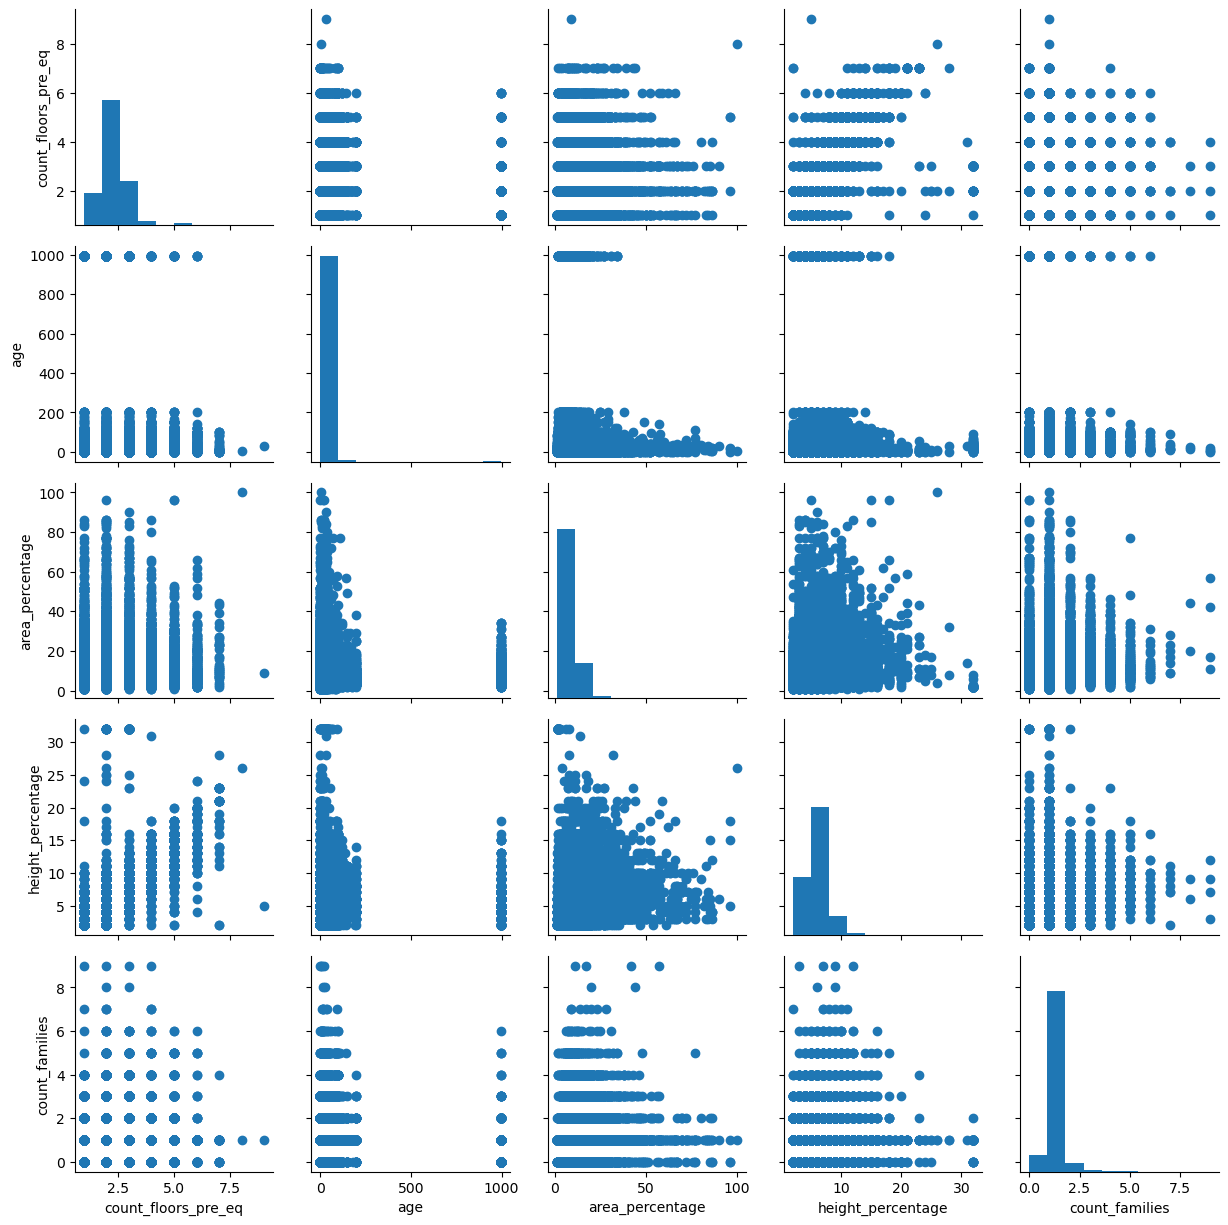

In [50]:
# checking relationship between numeric variables
g = sb.PairGrid(data = quake, vars = col_num)
g.map_diag(plt.hist)
g.map_offdiag(plt.scatter)



> The dataset has 260601 rows and 21 columns

> The main feature in this dataset is "damage grade" which is the level of destruction of buildings


> The following features of the building should affect damage degree in one way or the other. They are; 'count_floors_pre_eq', 'age', 'area_percentage', 'height_percentage', 'count_families', 'land_surface_condition', 'foundation_type', 'roof_type', 'ground_floor_type', 'other_floor_type', 'position','plan_configuration', 'legal_ownership_status', 'has_secondary_use', 'secondary_use_type', and 'superstructure_material'. However, for this analysis, 'count_floors_pre_eq', 'age', 'count_families', 'land_surface_condition', 'foundation_type', 'superstructure_material', 'has_secondary_use', 'secondary_use_type' are the features of interest 


## Univariate Exploration

> In this section, I investigate distributions of individual variables. 

#### Question 1: Whats the Age Range of Most Building in the region where the earthquake occured in Gorkha

##### Visualization

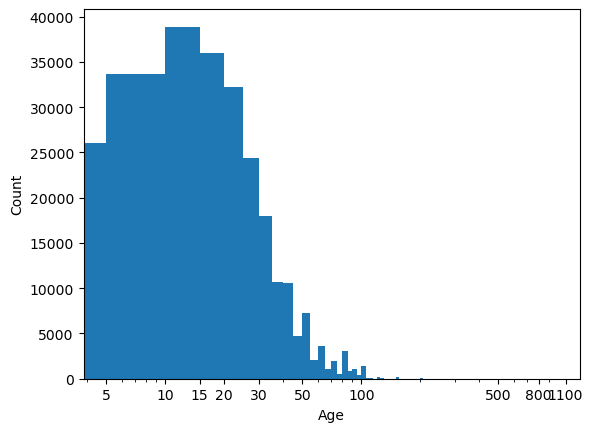

In [51]:
# Plot the histogram of age
bins=np.arange(0, (quake.age.max())+5, 5) 
plt.hist(quake.age, bins=bins);
plt.xscale('log') # change x-axis scale to the log type
ticks=(5, 10,15, 20, 30, 50, 100, 500, 800, 1100 )
plt.xticks(list(ticks), labels=ticks)
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

> Observation

>The majority of the buildings in the area are less than 50 years. However, a handful were about 995 years in age.

##### Question 2: What is the distribution of families counts in the area?

##### Visualization

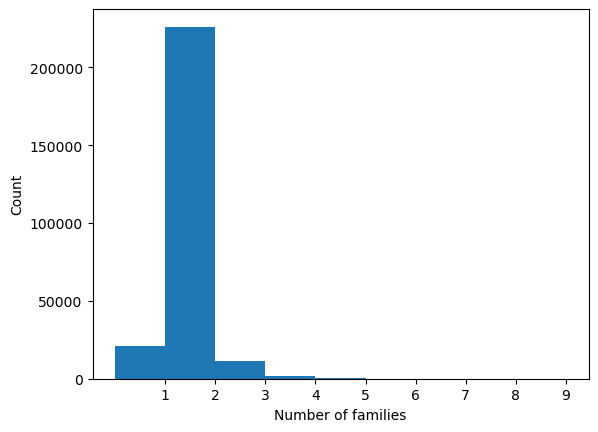

In [52]:
# plot the histogram of count families
bins=np.arange(0, (quake.count_families.max())+1, 1) 
plt.hist(quake.count_families, bins=bins);
ticks=(1,2, 3, 4, 5, 6, 7,8, 9  )
plt.xticks(list(ticks), labels=ticks)
plt.xlabel('Number of families')
plt.ylabel('Count')
plt.show()



> Observation

>The majority of the buildings in the area have one family living in them.  

#### Question 2: What types of structures are there in Gorkha before the earthquake?

##### Visualization

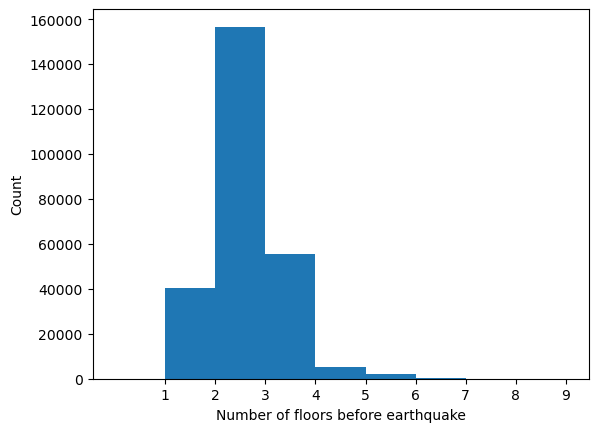

In [53]:
# plotting histogram of count floors pre earthquake
bins=np.arange(0, (quake.count_floors_pre_eq.max())+1,1) 
plt.hist(quake.count_floors_pre_eq, bins=bins);
ticks=(1,2, 3, 4, 5, 6, 7,8, 9  )
plt.xticks(list(ticks), labels=ticks)
plt.xlabel('Number of floors before earthquake')
plt.ylabel('Count')
plt.show()

The sructure in the area are more of two story building

#### Question 3: what is the land surface condition of the area, foundation type in general and building materials used throughout the region

##### Visualization

In [54]:
#define a function to plot qualitative variables
def count_plot(data, x=None, y=None, color=base_color, xlim= None): 
    '''
    This function plots the count plot of any given variable
    supply x values if number of unique values in variable is less than five
    supply y values if number of unique values in variable is greater than five
    xlim values should be a tuple of length 2
    '''
    # setting color
    base_color=sb.color_palette('bright')[0]
    sb.countplot(data=data, x=x, y=y, color=base_color)
    plt.xlim(xlim)
    plt.show()

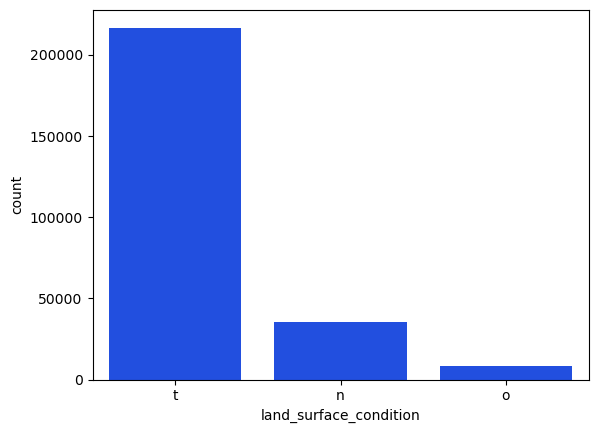

In [55]:
#plot count plot of land surface condition
count_plot(quake, x= 'land_surface_condition')

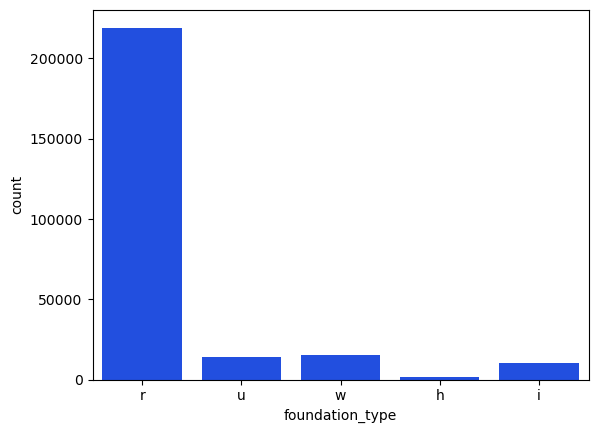

In [56]:
#plot count plot of foundation type
count_plot(quake, x= 'foundation_type')

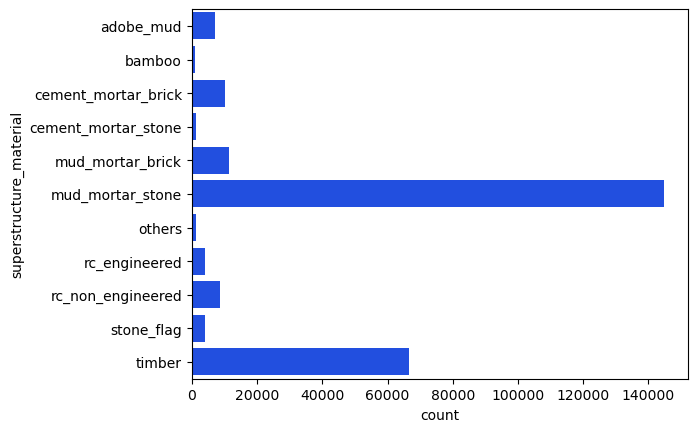

In [57]:
#plot count plot of superstructure_material
count_plot(quake, y='superstructure_material')

###### Observation:   
> The predominant foundation type is r-type foundation and the land surface condition is majorly (t)
> Mud Mortar stone and Timber are the predominant housing material in the area

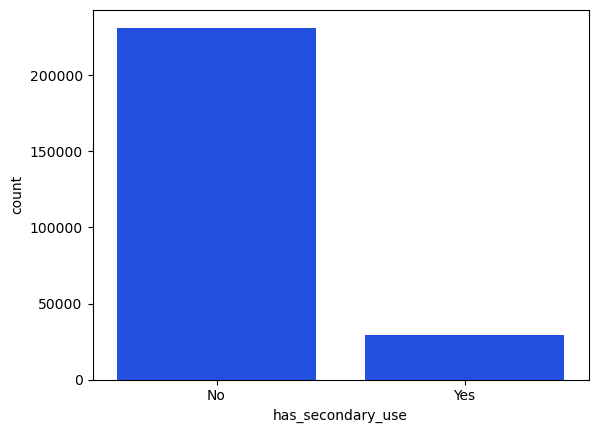

In [58]:
# checking the secondary usage distribution in the data set
count_plot(quake, x='has_secondary_use')

Observation

> majority of the houses doesnt have a secondary use other than for residential purpose

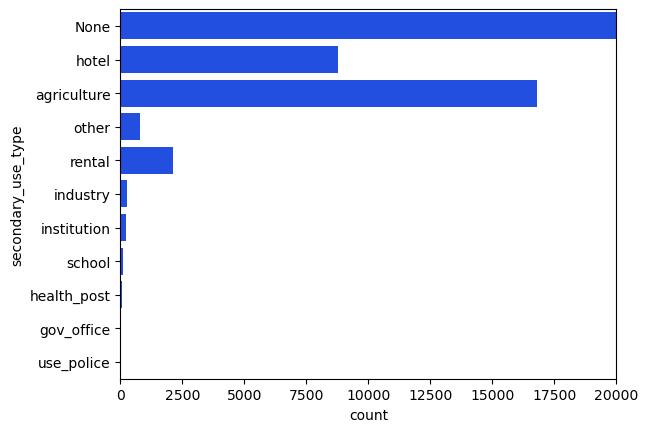

In [59]:
count_plot(quake, y='secondary_use_type', xlim= (0, 20000))

Apart from residential purpose, houses in the area are used for Agriculture and hotel purpose



> Most houses are two storey houses with one family predominantly living in them. It will be of interest to know the kind the impact earthquake will have on them through other features aswell. In addition, majority of the houses are built with mud mortar stone. It will also be interesting to know if these houses built with the mortar stone are prone to more damage or not. I am also interested in knowing the extent of damage on Reinforced concrete engineereed buildings and reinforced concrete non engineered buildings. I am also deciding to see the effect of secondary use on damage and what type of use has the most damage. Limit was set on the seconday use type axis to zoom into the categories. The t type land surface condition and the r-type foundation are the most common.

> The age column disstribution is skewed. There are a lot of gaps between the average building age and the oldest buildings. I want to see what percentage of the old building are subjected to high grade damage

## Bivariate Exploration

> In this section, I investigate relationships between pairs of variables in the data.

In [60]:
#Separating the qualitative and quantitative variable to plot once and avoid repetition
col_nums=['count_floors_pre_eq', 'age', 'count_families']
col_cats1=['land_surface_condition', 'foundation_type', 'has_secondary_use', 
       'damage_grade']
col_cats2=['secondary_use_type', 'superstructure_material']
# ordering damage grade
order_cat= ['low', 'medium', 'high']
cat_class= pd.api.types.CategoricalDtype(ordered = True, categories = order_cat)
quake['damage_grade']= quake['damage_grade'].astype(cat_class)


#### Question 1: What's the relationship between dage grade and the numerical columns

#### Visualization

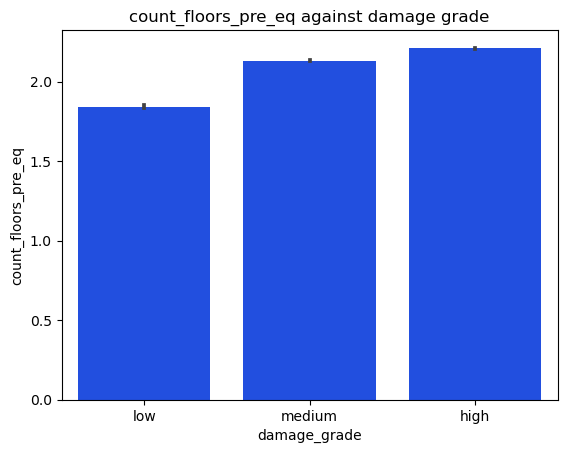

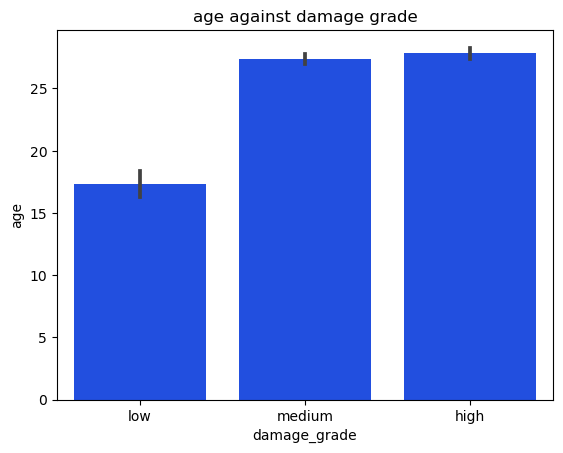

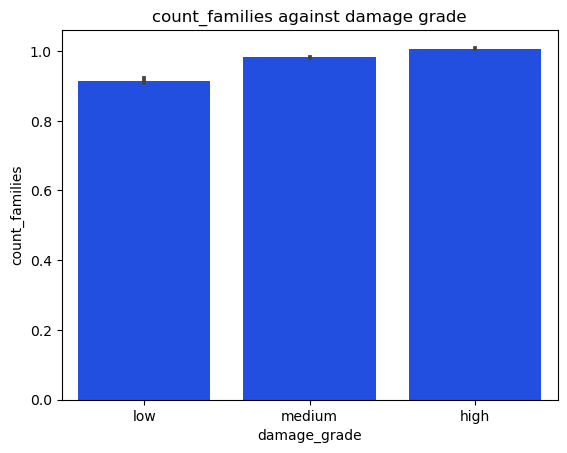

In [61]:
# bivariate plots of damage grade vs. 'count_floors_pre_eq', 'age', 'count_families'
for cols in col_nums:
    sb.barplot(data=quake, x='damage_grade', y=cols, color=base_color)
    plt.title(f'{cols} against damage grade')
    plt.show()

##### Observation 

modern houses with ages around 15 years has low damage impact. Almost all houses beyond 15 years risk medium or high destruction grade. count families and floors pre earth quake tend to be lower in low effect damage grade

#### Question 2: What's the relationship between damage grade and the categorical columns

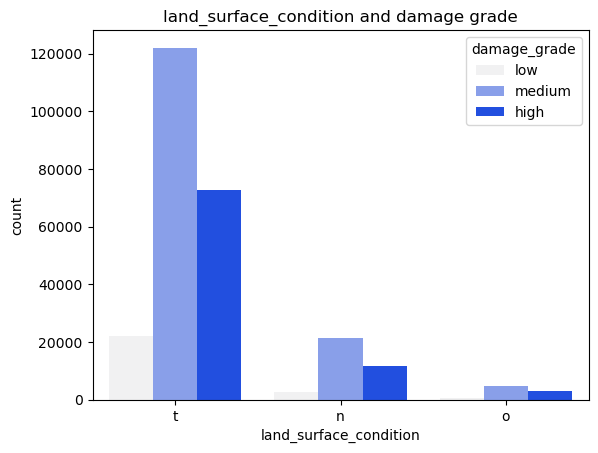

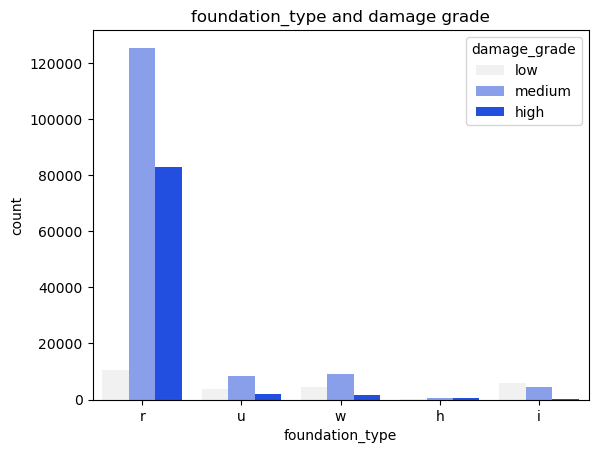

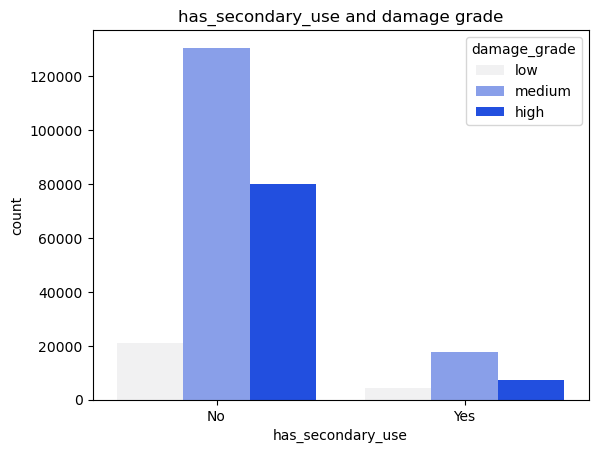

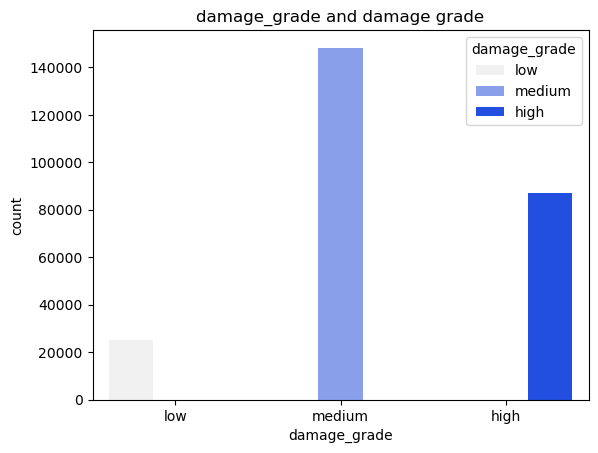

In [62]:
# plot variables in cat1
for cols in col_cats1:
    sb.countplot(data=quake,x=cols, hue='damage_grade', color=base_color)
    plt.title(f'{cols} and damage grade')
    plt.show()

##### Observation

All features are associated with all the three levels of damage. Having a third variable plotted together can help us discern their relationships. Many houses with no secondary use has medium to high damage grade. 

r-type foundation in the area are the most common and they are the ones that suffer major destruction. The i-type foundation barely result in high grade destruction

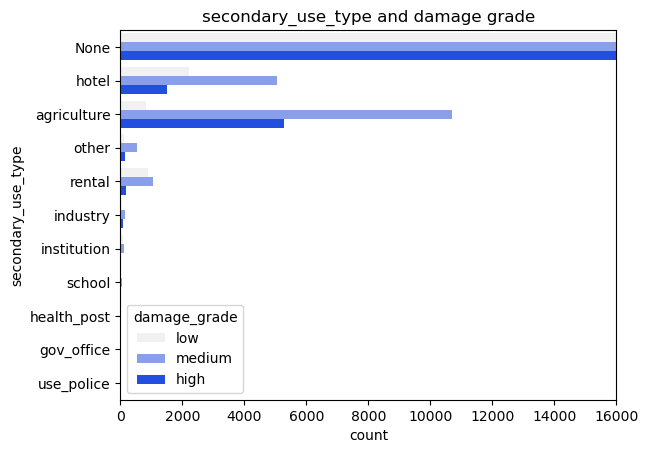

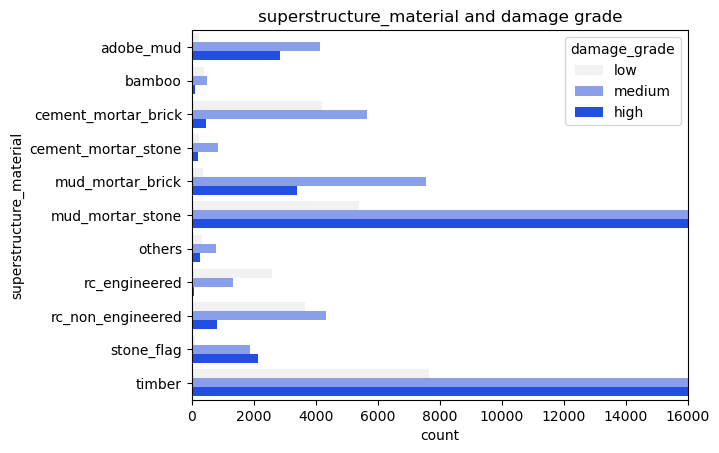

In [63]:
#plot variables in cat2 columns
for cols in col_cats2:
    sb.countplot(data=quake,y=cols, hue='damage_grade', color=base_color)
    plt.xlim((0,16000))
    plt.title(f'{cols} and damage grade')
    plt.show()

##### Observation

Of the two prominent use types, hotel and agriculture, building used for Agriculture are severely damaged. Also houses built with mud mortar stone and mud mortar brick are awfully damaged compared to houses made with timber. Rc_engineered buildings shows more tendency to with earthquake destruction compared to Rc_non_engineered buildings. 

#### Question 3: What's the relationship between superstructure_material and the secondary_use_type

In [64]:
# setting color palette
cvc=sb.color_palette("RdPu", 3)

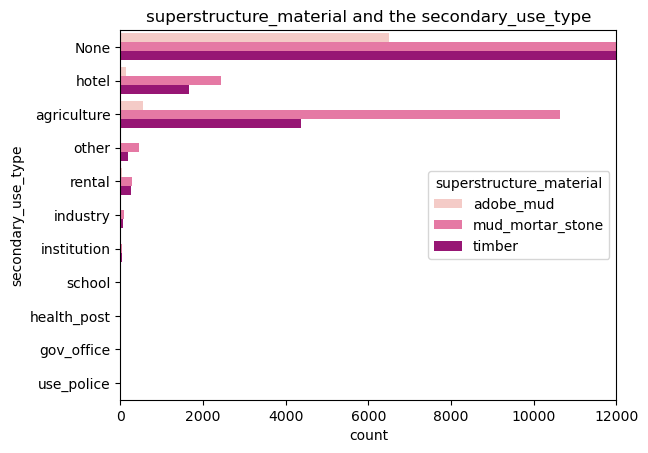

In [65]:
# create a dataframe for superstructure_material that are either 'mud_mortar_stone', 'adobe_mud', or 'timber'
quake_sub1=quake.loc[quake['superstructure_material'].isin(['mud_mortar_stone', 'adobe_mud', 'timber'])]

# plot 
sb.countplot(data=quake_sub1,y='secondary_use_type', hue='superstructure_material', palette= cvc)
plt.title('superstructure_material and the secondary_use_type')
plt.xlim((0,12000))
plt.show()

#### Observation

This plot explains why there are many high-medium damage grade associated with building with no secondary use. This is because majority of these houses are built with mud mortar stone which is very prone to high damage grade. Also, Majority of the buildings used for agricultural purpose are built with mud mortar stone hence the reason for the high grade damage.

#### Question 4: Does foundation type varies with land surface condition?

##### Visualization

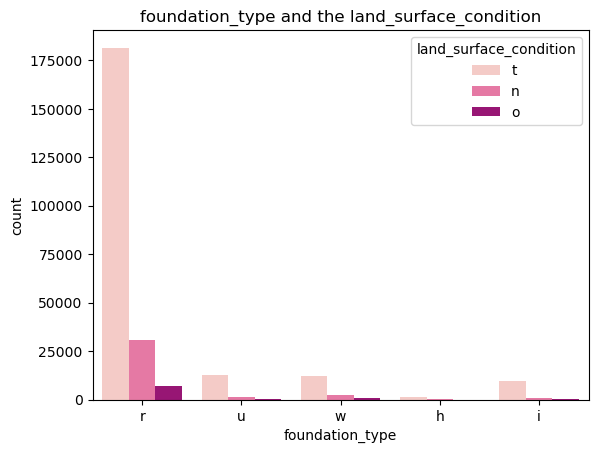

In [66]:
#nplot foundation type and land surface condition 
sb.countplot(data=quake,x='foundation_type', hue='land_surface_condition', palette= cvc)
plt.title('foundation_type and the land_surface_condition')
plt.show()

##### Observation

Land surface condition is majorly t- type in all the foundation type. Therefore, it is safe to say that the land surface condition in Gorkha is majorly t-type


#### Question 5: Does count_floors_pre_eq varies with age and foundation type?

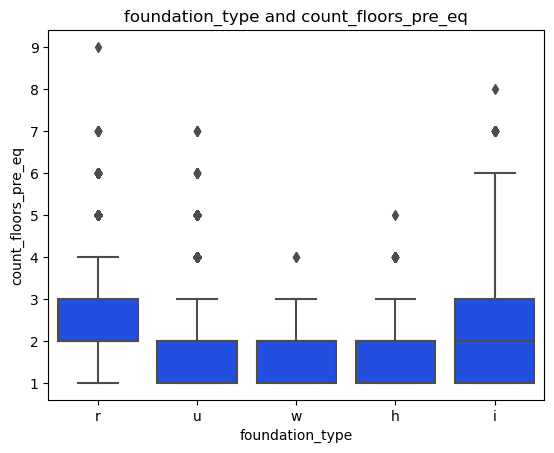

In [67]:
# boxplot count_floors_pre_eq, age and foundation type
sb.boxplot(data=quake,x='foundation_type', y='count_floors_pre_eq', color=base_color)
plt.title('foundation_type and count_floors_pre_eq')

plt.show()

##### Observation

Scatter plot is not giving a definite relationship, but boxplot did. The old houses in the area has 4, 5, 6 floors. r type foundation was used for any kind of floor

#### Question 6: What's the relationship between superstructure_material, land surface condition, foundation type and age, 

##### Visualization 

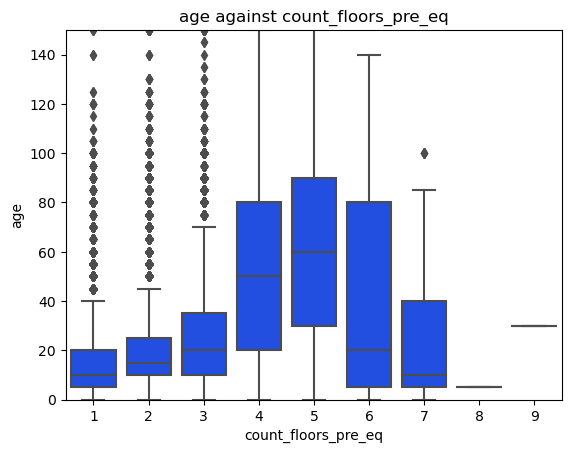

In [68]:
# Box plot of count floors pre eq and age
sb.boxplot(data=quake,x='count_floors_pre_eq', y='age', color=base_color)
#setting y limit to zoom into the age column
plt.ylim((0, 150))

plt.title('age against count_floors_pre_eq')
plt.show()

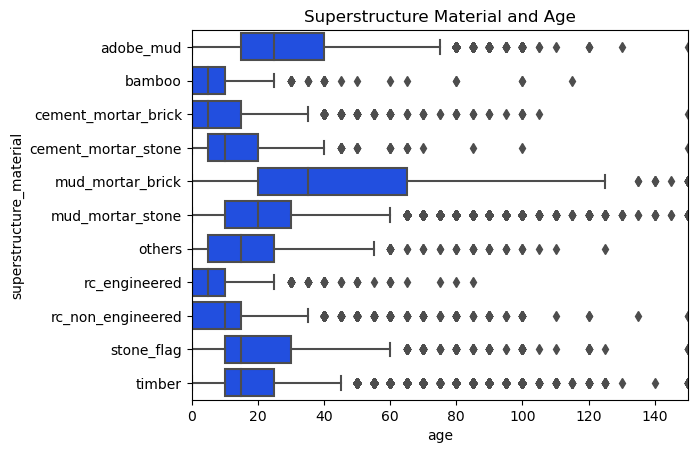

In [69]:
# Box plot of superstructure_material and age
sb.boxplot(data=quake, x='age',y='superstructure_material', color=base_color)
#setting y limit to zoom into the age column
plt.xlim((0, 150))
plt.title('Superstructure Material and Age')
plt.show()

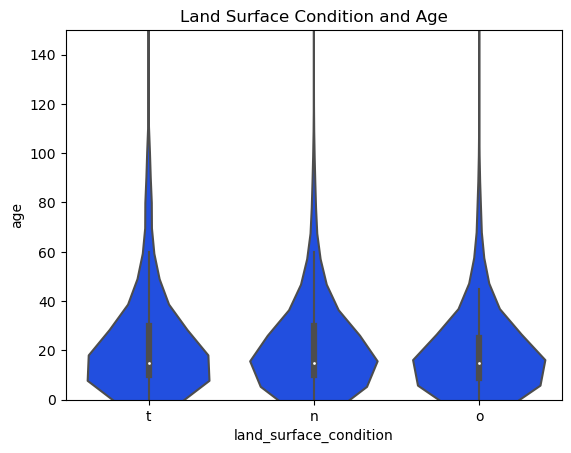

In [70]:
# violin plot of land surface condition and age
sb.violinplot(data=quake, x='land_surface_condition', y='age', color=base_color)
#setting y limit to zoom into the age column
plt.ylim((0,150))
plt.title('Land Surface Condition and Age')
plt.show()

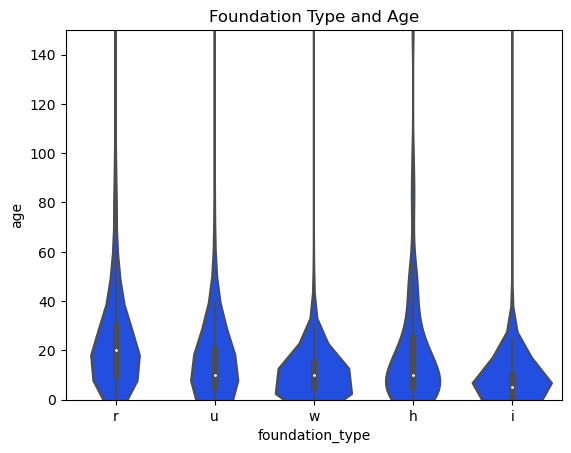

In [71]:
# violinplot of foundation type and age
sb.violinplot(data=quake, x='foundation_type', y='age', color=base_color)
#setting y limit to zoom into the age column
plt.ylim((0,150))
plt.title('Foundation Type and Age')
plt.show()

#### Observation 

mud mortar brick houses are the oldest. we could check their relationship with damage grade

Land surface condition does not seem to change with age.

Modern houses are built with foundation type i, while much older houses are built with foundation type r. I want to see the how this plays between the level of damage.

Age and foundation type relates well with the level of floors. Also, foundation type, superstructure materials and age seem to have a relationship.

## Multivariate Exploration

#### Question 1: What's the relationship between height of building, age and damage grade.| 

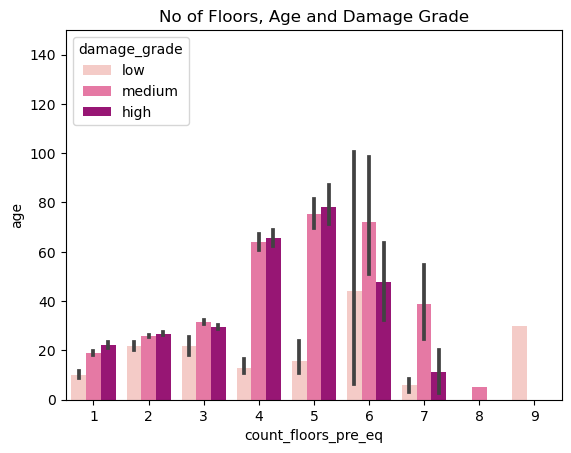

In [72]:
# barplot of count floors, age and damage grade
sb.barplot(data=quake,x='count_floors_pre_eq', y='age', hue='damage_grade', palette=cvc)
#setting y limit to zoom into the age column
plt.ylim((0, 150))
plt.title('No of Floors, Age and Damage Grade')
plt.show()

##### Observation

Newer houses with one and two floors  have almost equal proportion of damage grade which shows there are other features at play. high rise older houses shows increase in dammage grade with height. 

#### Question 2: What's the relationship between height of building, age and damage grade and foundation type. 

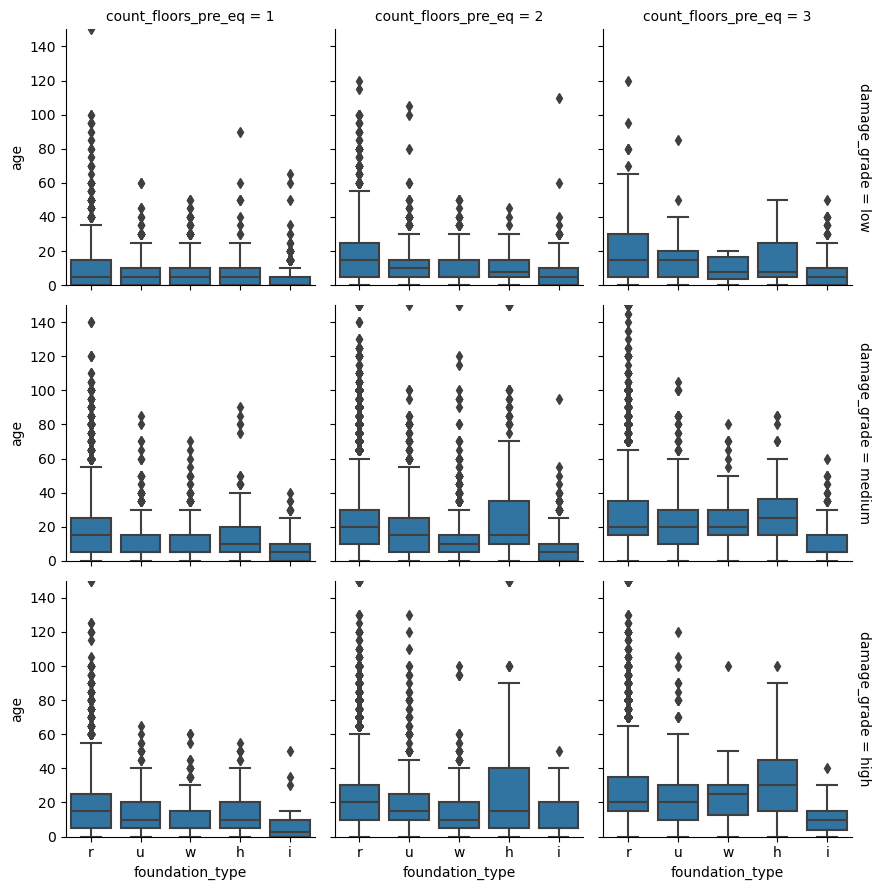

In [73]:
# get  a dataframe of count floors less than 3
quake_sub=quake.loc[quake['count_floors_pre_eq'].isin([1,2,3])]
# boxplot of count floors, age and damage grade
g = sb.FacetGrid(data = quake_sub, row= 'damage_grade', col = 'count_floors_pre_eq', height = 3, margin_titles= True)
g.map(sb.boxplot, 'foundation_type', 'age', order= ['r','u','w','h', 'i'])
g.set(ylim=(0,150))

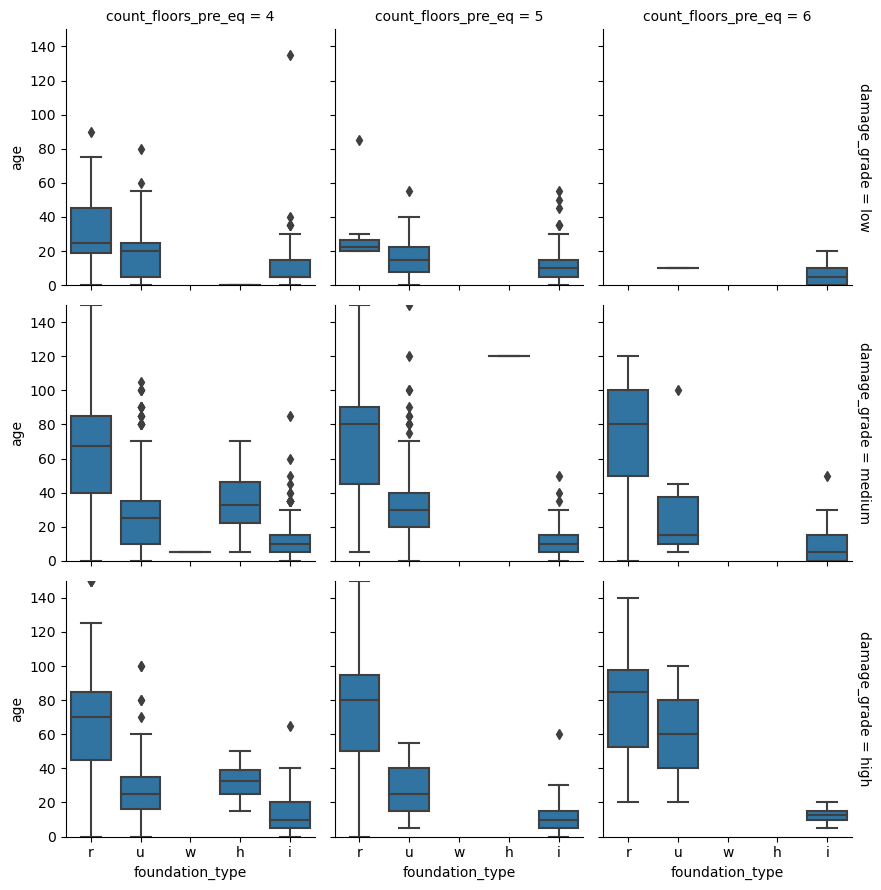

In [74]:
# get  a dataframe of count floors greater than 3
quake_sub=quake.loc[quake['count_floors_pre_eq'].isin([4,5,6])]
# boxplot of count floors, age and damage grade
g = sb.FacetGrid(data = quake_sub, row= 'damage_grade', col = 'count_floors_pre_eq', height = 3, margin_titles= True)
g.map(sb.boxplot, 'foundation_type', 'age', order= ['r','u','w','h', 'i'])
g.set(ylim=(0,150))

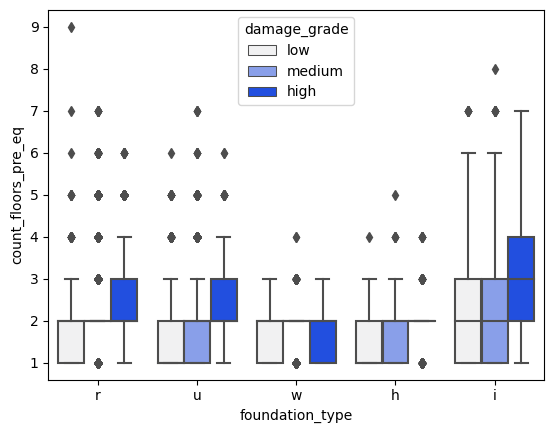

In [75]:
# boxplot of count floors, foundation type and damage grade
sb.boxplot(data=quake,x='foundation_type', y='count_floors_pre_eq', hue='damage_grade', color=base_color)

plt.show()

#### Observation

For floor count less than 3, age seem the only relational factor. However, the r and u type foundation worsen damage with age and also with the number of floors. For the 6 floors buildings, r and u type has no low damage level except that they are always high!

#### Question 3: which superstructure material poses more threat ?

In [76]:
quake_sub.superstructure_material.unique()

array(['adobe_mud', 'bamboo', 'cement_mortar_brick',
       'cement_mortar_stone', 'mud_mortar_brick', 'mud_mortar_stone',
       'others', 'rc_engineered', 'rc_non_engineered', 'stone_flag',
       'timber'], dtype=object)

Text(0.5, 0.98, ' Impact of Superstructure Material on Damage Grade')

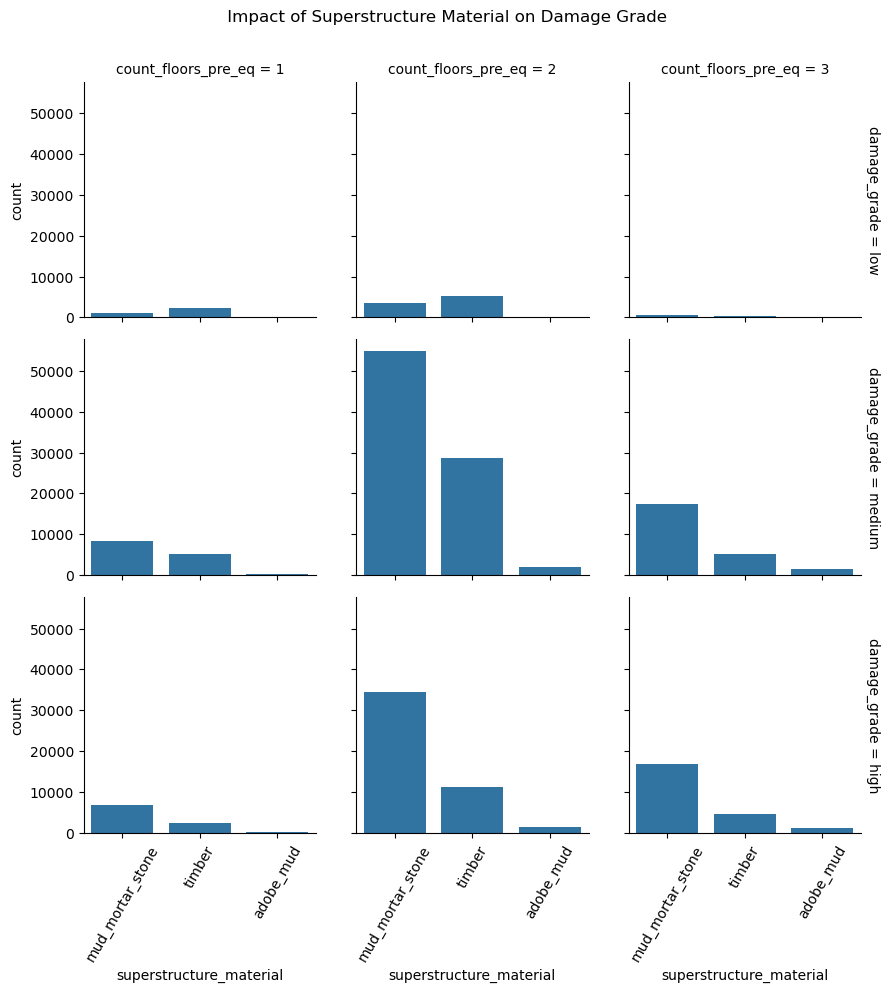

In [77]:
# get  a dataframe of count floors less than 3
quake_sub2=quake_sub1.loc[quake_sub1['count_floors_pre_eq'].isin([1,2,3])]
#countplot
g = sb.FacetGrid(data = quake_sub2, row= 'damage_grade', col = 'count_floors_pre_eq', height = 3, margin_titles= True)
g.map(sb.countplot, 'superstructure_material', order=[ 'mud_mortar_stone','timber', 'adobe_mud'])
g.set_xticklabels(rotation=60)
g.fig.subplots_adjust(top=0.9)
g.fig.suptitle(' Impact of Superstructure Material on Damage Grade')

##### Observation 

In buildings with less than 3 floor counts, mud_mortar stone poses more threat

#### Question 4: Does secondary use has effect on damage grade?

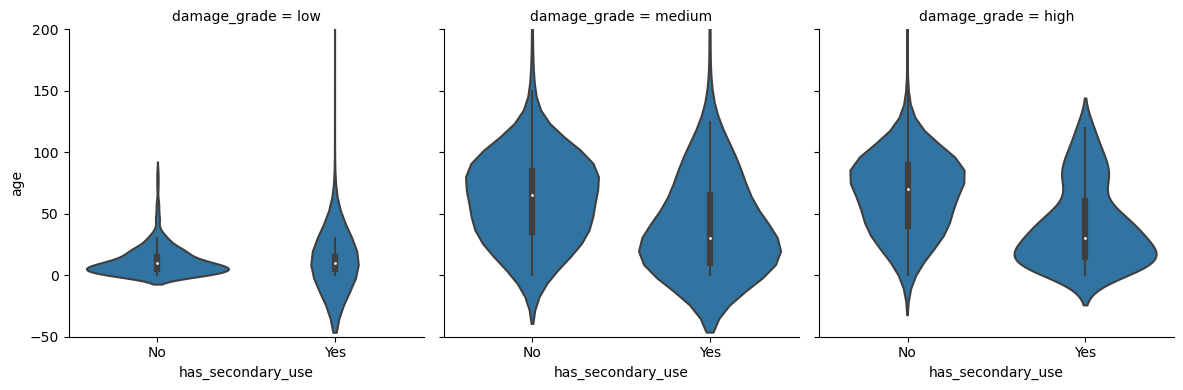

In [78]:
# violin plot of damage grade and secondary use
g = sb.FacetGrid(data = quake_sub, col= 'damage_grade', height = 4)
g.map(sb.violinplot, 'has_secondary_use', 'age', order= ['No','Yes'])
# set y limits to dislay whole data
g.set(ylim=(-50,200))

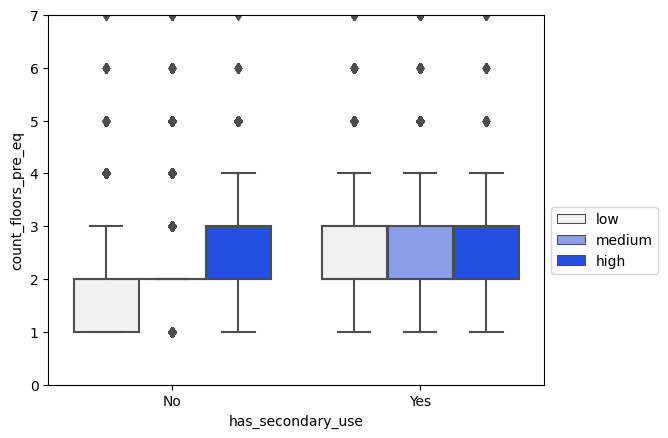

In [79]:
# box plot of secondary use  and Damage Grade
sb.boxplot(data=quake,x='has_secondary_use', y='count_floors_pre_eq', hue='damage_grade',color=base_color)
plt.ylim((0, 7))
plt.legend(bbox_to_anchor=(1.0,0.5))
g.fig.subplots_adjust(top=0.9)
g.fig.suptitle(' Impact of secondary use on Damage Grade')
plt.show()

##### Observation

box plot is not showing much variations in age and secondary use, so i decided to use the violin plot. low grade destruction is more prominent with youger houses with or without a secondary use. Medium grade damage in houses with secondary use increased around the same age range of those without a secondary use just that age is also a major determinant. Houses with with seconday use are prone to all kinds of damage



On Secondary use and high damage, houses with no secondary use and with 3 or more floors are the highly damage ones. 
Bulding material type also play a huge role. mud mortar stone  and timber houses which are majorly houses with no use and low number of floor are severly damaged. 

## Conclusions
> Predominant foundation type is r-type foundation and it is more susceptible to high grade earthquake damage.

> The r and u type foundation worsen with age and also with the number of floors. for the 6 floors buildings, r and u type has no low damage level except that they are always high!

> land surface condition is majorly t-type and it shows no variation with fundation type, age, and damage grade.

> Newer houses with one and two floors have almost equal proportion of damage grade which shows there are other features at play. High rise older houses shows increase in dammage grade with height.

> Mud mortar stone  and timber houses which are majorly houses with no use and low number of floor are severely damaged. Also  those with use specifically agriculture and rental are damaged greatly which is also apparently due to the nature of building material - mud mortar stone, mud mortar brick and timber

> In addition, Medium - High grade damage in houses with secondary use increased around the same age range of those without a secondary use just that age is also a major determinant. Therefore a much older houses suffer both medium and high destruction. Houses with with seconday use are prone to all kinds of damage

